In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize'] =10,6
%matplotlib inline

In [20]:
df= pd.read_csv('C:\\Users\\Anjali\\Desktop\\JupyterFiles\\SampleSuperstore.csv')

In [21]:
df.rename(columns={'Ship Mode':'Ship_mode','Postal Code':'Postal_code','Sub-Category':'Sub_cat'},inplace=True)
df.drop(['Postal_code','Country'],axis=1,inplace=True)
df.head()

,Ship_mode,Segment,City,State,Region,Category,Sub_cat,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [22]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

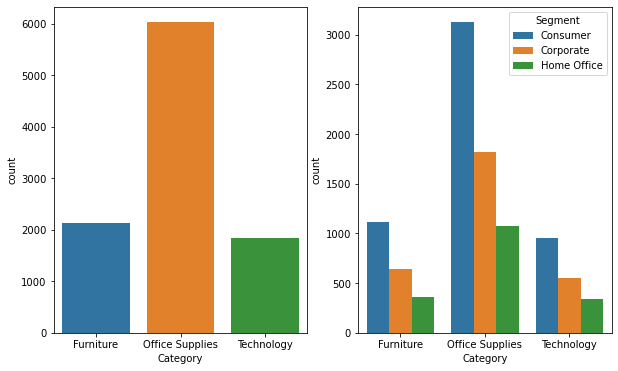

In [23]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
f1=sns.countplot('Category',data=df,ax=axes[0])
f2=sns.countplot('Category',hue='Segment',data=df,ax=axes[1])
plt.show()

Sale of office supplies is way higher than the other two categories.
The distribution is highest in Consumer Segment.

In [24]:
fig = px.sunburst(df,path=['Category','Sub_cat'],values='Sales',color='Category')
fig.update_layout(height=750,title_text='Product and Sub-Categories')
fig.show()

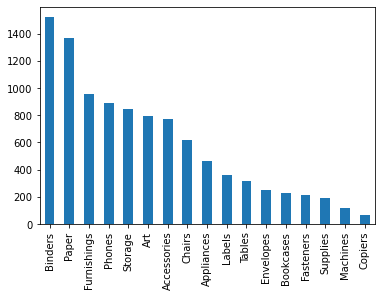

In [25]:
df['Sub_cat'].value_counts().plot(kind="bar")
plt.show()

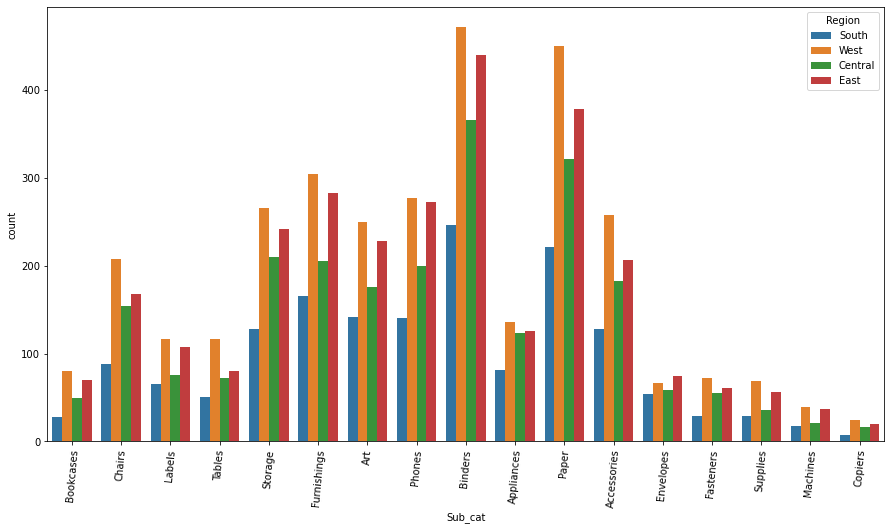

In [26]:
plt.figure(figsize=(15,8))
sns.countplot('Sub_cat',hue='Region',data=df)
plt.xticks(rotation=85)
plt.show()

People residing in Western part of US tend to order the most from superstor and Southern part the least

In [27]:
from matplotlib.pyplot import sca

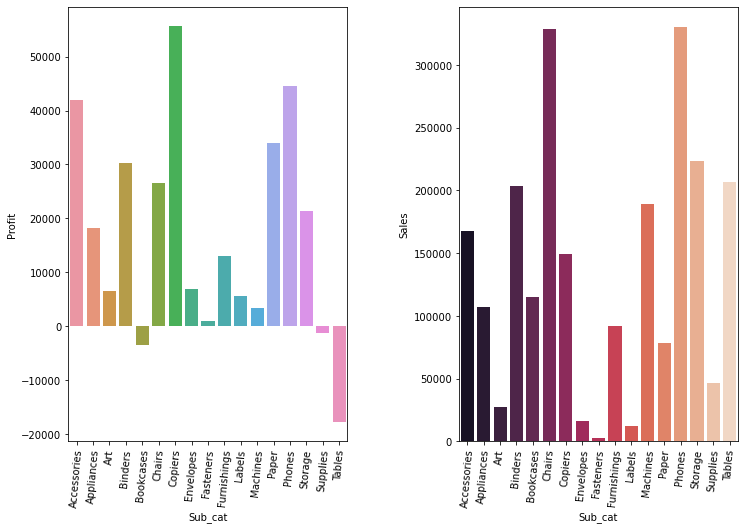

In [28]:
agg=df.groupby('Sub_cat')['Profit','Sales'].sum().reset_index()
fig,axes=plt.subplots(1,2,figsize=(12,8),sharex=True)
plt.subplots_adjust(wspace=0.4)
k1 = sns.barplot(y='Profit',x='Sub_cat',data=agg, ci=0, ax=axes[0])
k2 = sns.barplot(y='Sales',x='Sub_cat',data=agg, ci=0, ax=axes[1], palette = "rocket")
for ax in fig.axes:
    sca(ax)
    plt.xticks(rotation=85)
plt.show()

Highest profit is earned in Copiers while selling price for Chairs and Phones are the highest.
People dont prefer to buy Tables, Bookcases and Supplies from superstore and hence these departments are in loss.


In [29]:
df['Cost']=df['Sales']-df['Profit']
df['Profit_percent']=(df['Profit']/df['Cost'])*100

In [30]:
df[['City','Profit','Profit_percent']].sort_values('Profit',ascending=False).head(10)

,City,Profit,Profit_percent
6826,Lafayette,8399.9760,92.307692
8153,Seattle,6719.9808,92.307692
4190,Newark,5039.9856,92.307692
9039,Detroit,4946.3700,100.000000
4098,Minneapolis,4630.4755,96.078431
2623,New York City,3919.9888,53.846154
509,Atlanta,3177.4750,100.000000
8488,Arlington,2799.9840,47.058824
7666,Providence,2591.9568,92.307692
6520,Jackson,2504.2216,85.185185


In [31]:
df[['State','Profit','Profit_percent']].sort_values('Profit',ascending=False).head(10)

,State,Profit,Profit_percent
6826,Indiana,8399.9760,92.307692
8153,Washington,6719.9808,92.307692
4190,Delaware,5039.9856,92.307692
9039,Michigan,4946.3700,100.000000
4098,Minnesota,4630.4755,96.078431
2623,New York,3919.9888,53.846154
509,Georgia,3177.4750,100.000000
8488,Virginia,2799.9840,47.058824
7666,Rhode Island,2591.9568,92.307692
6520,Michigan,2504.2216,85.185185


<Figure size 864x720 with 0 Axes>

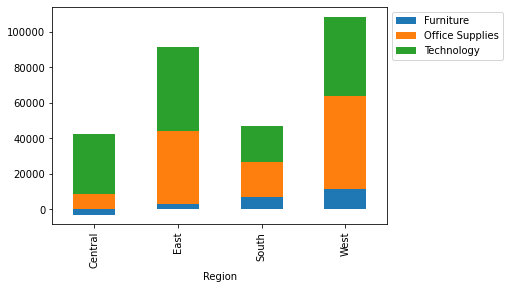

In [32]:
plt.figure(figsize=(12,10))
pd.crosstab(df["Region"],df["Category"],df["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Profit is most in the West region and least in Central region

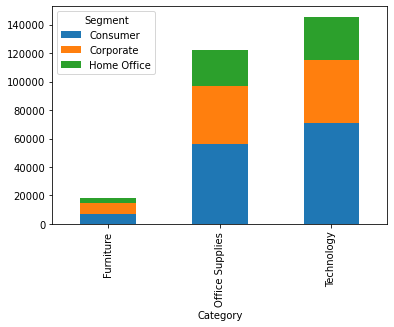

In [33]:
pd.crosstab(index=df["Category"],columns=df["Segment"],values=df["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)
plt.show()

In [35]:
kk = df.groupby('Category')['Sales','Profit'].sum().reset_index()
kk.sort_values('Profit',ascending=False)

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
1,Office Supplies,719047.0320,122490.8008
0,Furniture,741999.7953,18451.2728


Office supplies is the most selling category but the profit is highest from the Technology sector. Under Technology,  the profit is most from the Consumers segment

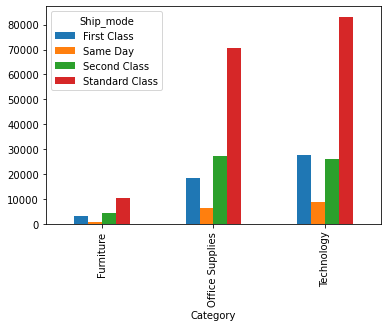

In [34]:
pd.crosstab(index=df["Category"],columns=df["Ship_mode"],values=df["Profit"],aggfunc="sum").plot(kind="bar")
plt.show()

The profit is very high when the ship mode is Standard class


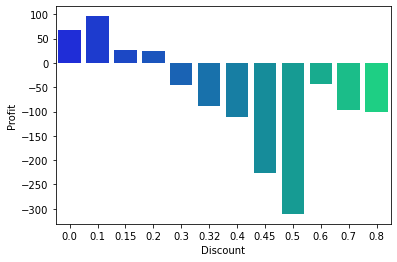

In [36]:
sns.barplot("Discount","Profit",data=df,ci=0,palette='winter')
plt.show()

It can be observed that till discount=0.3, there is a profit. But for discount greater than 0.3 there is a loss.